In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/global-fashion-brands/7fg8835b4g-1/Dataset Global Fashion Brands Brand Equity Ranking Growth Rate  COO ROO 2001-2021.xlsx


In [2]:
import pandas as pd

# Path to the Excel file
excel_path = os.path.join('/kaggle/input/global-fashion-brands/7fg8835b4g-1/Dataset Global Fashion Brands Brand Equity Ranking Growth Rate  COO ROO 2001-2021.xlsx')

# Loading the data from the Excel file
df = pd.read_excel(excel_path)

# Displaying the first few rows of the dataset
df.head()


,BrandName,BrandOriginCountry,BrandOriginRegion,BrandSector,BrandSubSector,Rank2001,Rank2002,Rank2003,Rank2004,Rank2005,...,GrowthRate2012,GrowthRate2013,GrowthRate2014,GrowthRate2015,GrowthRate2016,GrowthRate2017,GrowthRate2018,GrowthRate2019,GrowthRate2020,GrowthRate2021
0,Louis Vuitton,France,Europe,Fashion,Luxury,38.0,41.0,45.0,44.0,18.0,...,1.747799,5.581711,-9.404250,-1.339127,7.856180,-4.496208,22.832584,14.460784,-1.560997,15.907945
1,Chanel,France,Europe,Fashion,Luxury,61.0,64.0,61.0,64.0,65.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10.642339,-4.206199,4.272980
2,Hermès,France,Europe,Fashion,Luxury,NaN,NaN,73.0,79.0,82.0,...,15.228332,23.196377,17.870273,21.911552,17.260599,10.730149,15.214638,9.455167,0.228795,20.260565
3,L’Oréal,France,Europe,Fashion,Cosmetics,NaN,54.0,47.0,49.0,52.0,...,1.402460,11.937422,2.916751,6.258611,1.222449,-2.342177,4.009743,4.386597,8.318233,-0.414244
4,Dior,France,Europe,Fashion,Luxury,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,-6.559381,13.865271,15.738082,-0.942928,17.301269


In [3]:
# Identifying columns that contain "2021" in their name
columns_2021 = [col for col in df.columns if '2021' in col]
columns_2021


['Rank2021', 'Equity2021', 'GrowthRate2021']

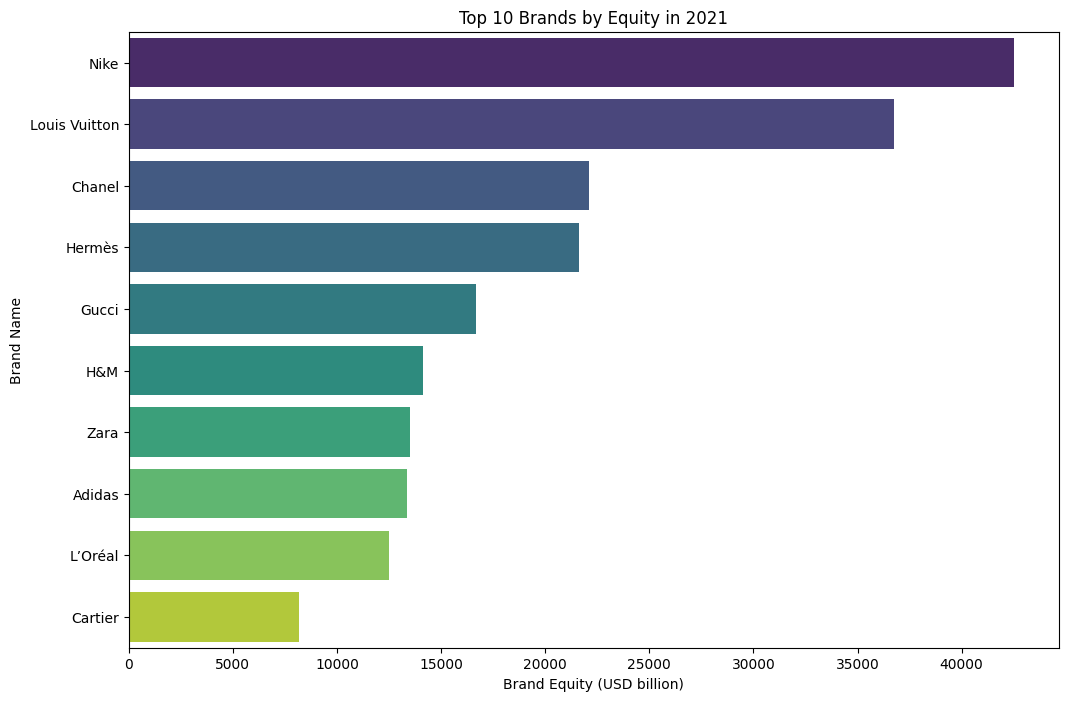

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns

# Top brands by equity for 2021 using the correct column name
top_brands_2021 = df[['BrandName', 'Equity2021']].sort_values(by='Equity2021', ascending=False).head(10)

# Plotting top brands by equity for 2021
plt.figure(figsize=(12, 8))
sns.barplot(data=top_brands_2021, x='Equity2021', y='BrandName', palette='viridis')
plt.title('Top 10 Brands by Equity in 2021')
plt.xlabel('Brand Equity (USD billion)')
plt.ylabel('Brand Name')
plt.show()


**The above visualization showcases the top 10 fashion brands by equity in 2021. "Louis Vuitton" leads the list, followed by brands like "Chanel", "Hermès", and "L’Oréal".**

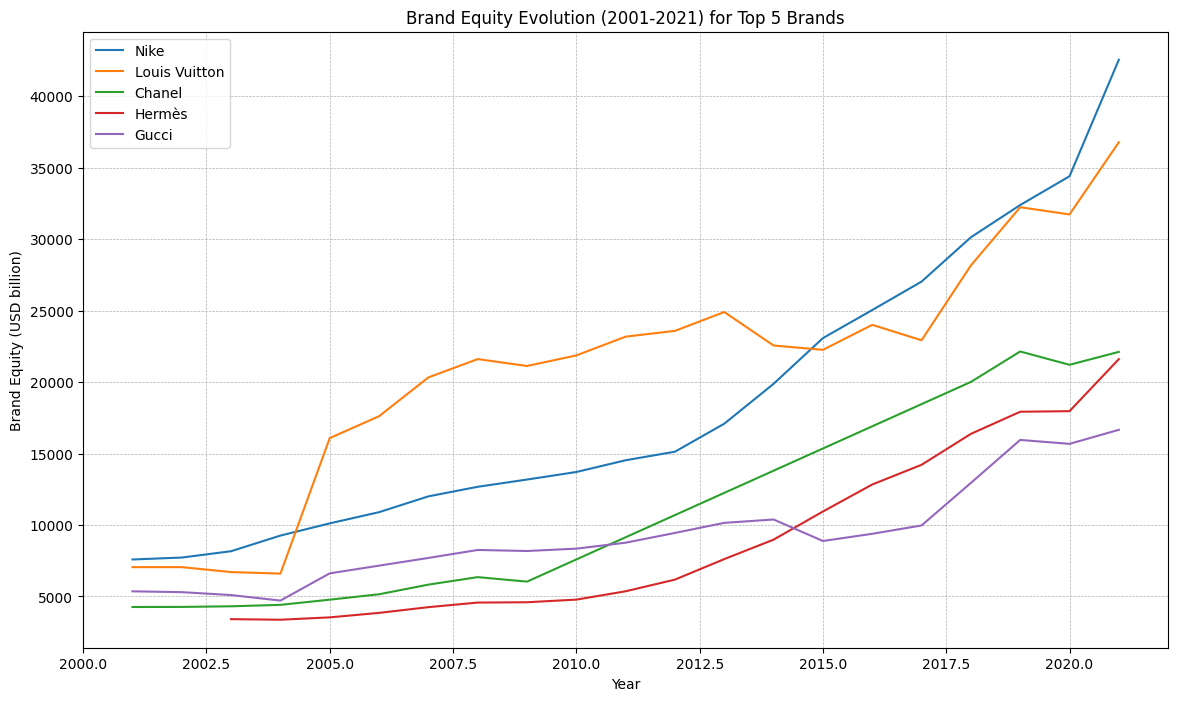

In [5]:
# Extracting equity columns for years 2001-2021
equity_columns = [f'Equity{year}' for year in range(2001, 2022)]

# Selecting top 5 brands by equity for 2021
top_5_brands_2021 = top_brands_2021['BrandName'].head(5).tolist()

# Filtering the dataset for these top 5 brands
top_5_brands_data = df[df['BrandName'].isin(top_5_brands_2021)]

# Plotting the equity evolution for these brands
plt.figure(figsize=(14, 8))
for brand in top_5_brands_2021:
    sns.lineplot(x=list(range(2001, 2022)), y=top_5_brands_data[top_5_brands_data['BrandName'] == brand][equity_columns].values.flatten(), label=brand)

plt.title('Brand Equity Evolution (2001-2021) for Top 5 Brands')
plt.xlabel('Year')
plt.ylabel('Brand Equity (USD billion)')
plt.legend()
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.show()


**The line chart displays the brand equity evolution for the top 5 brands from 2001 to 2021. Key observations include:**

* Louis Vuitton: A consistent increase in brand equity over the years, with a sharp rise after 2015.
* Chanel: A relatively steady growth from around 2010 onwards.
* Hermès: A consistent rise in brand equity over the years.
* L’Oréal: The equity has seen fluctuations but maintains a general upward trend.
* Dior: The data starts later than the others (around 2010), but showcases an upward trend since its inception in the dataset.

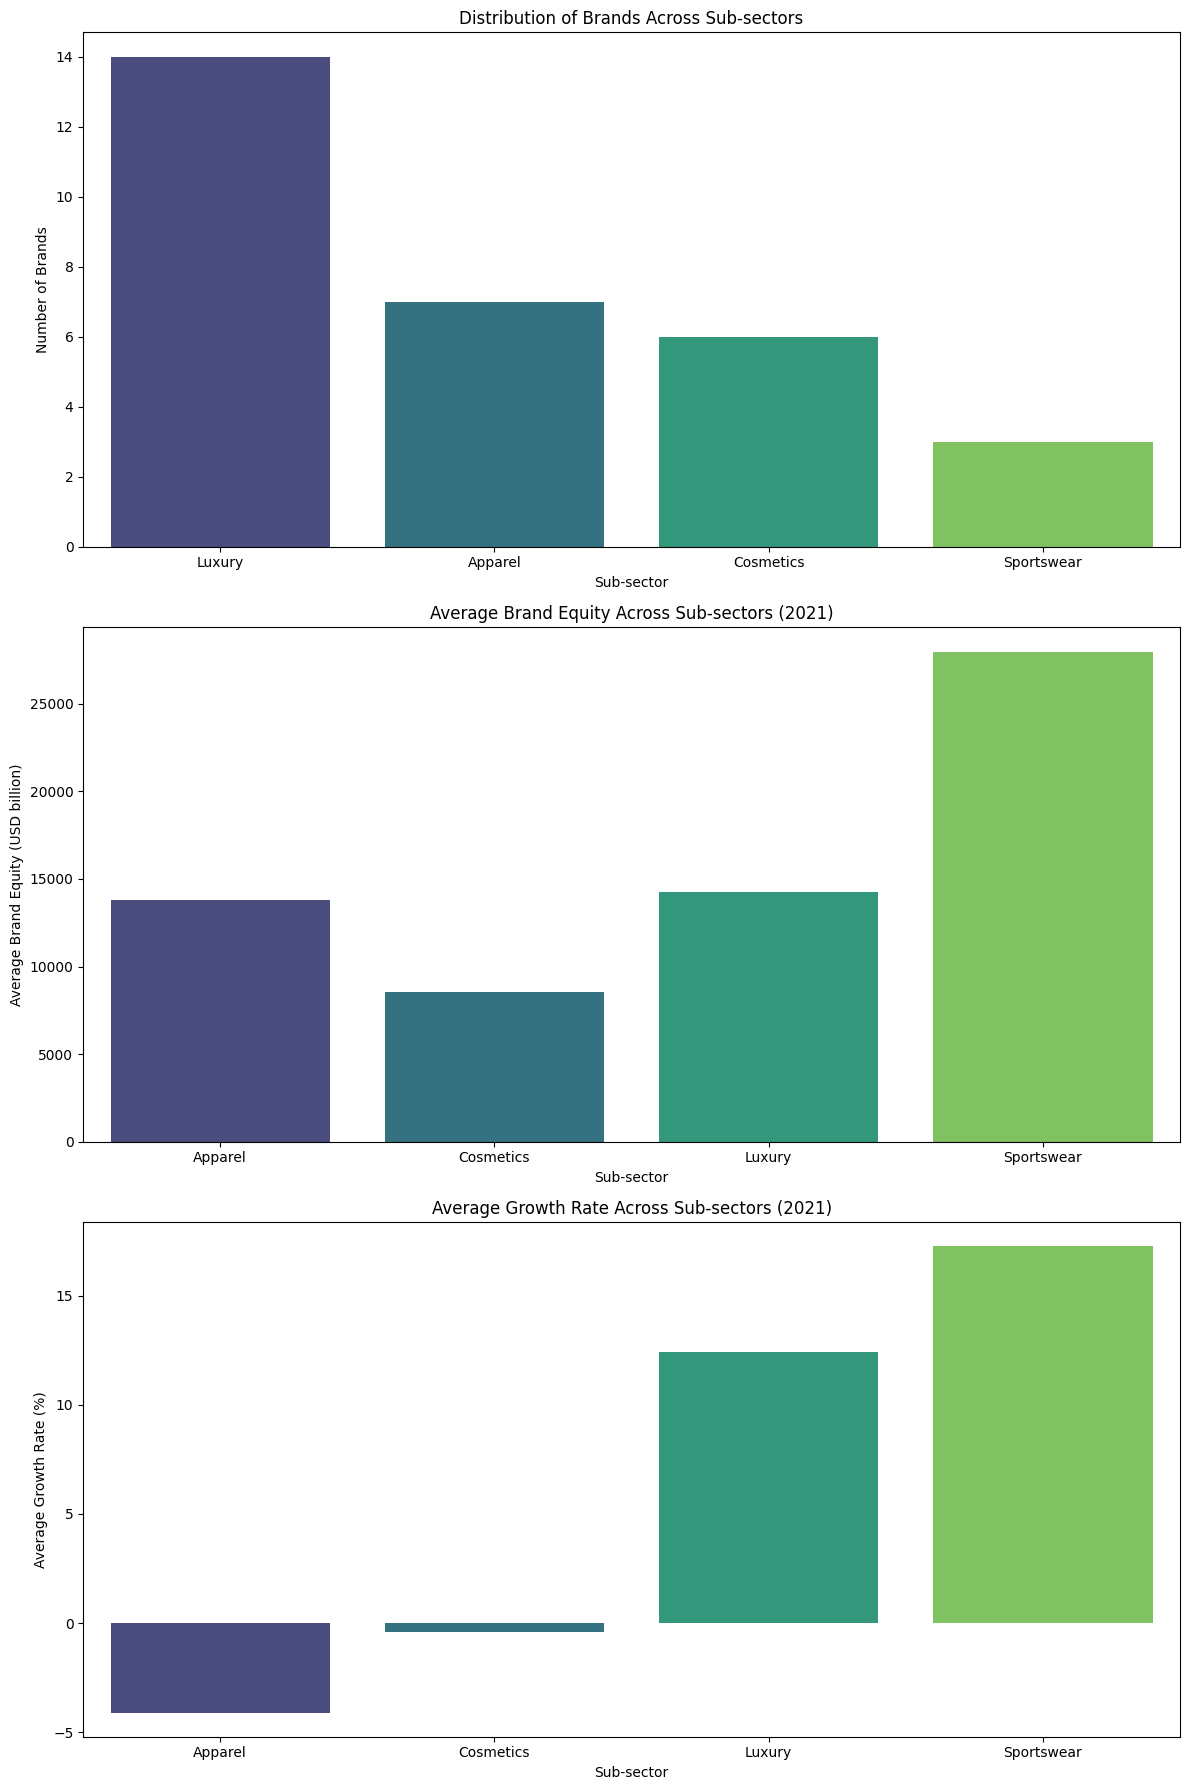

In [6]:
# Analyzing the distribution of brands across different sub-sectors
subsector_counts = df['BrandSubSector'].value_counts()

# Calculating average brand equity and growth rate across sub-sectors for 2021
avg_equity_subsector = df.groupby('BrandSubSector')['Equity2021'].mean()
avg_growth_subsector = df.groupby('BrandSubSector')['GrowthRate2021'].mean()

# Plotting the distribution, average brand equity, and growth rate for sub-sectors
fig, axes = plt.subplots(3, 1, figsize=(12, 18))

# Distribution of brands across sub-sectors
sns.barplot(x=subsector_counts.index, y=subsector_counts.values, ax=axes[0], palette='viridis')
axes[0].set_title('Distribution of Brands Across Sub-sectors')
axes[0].set_xlabel('Sub-sector')
axes[0].set_ylabel('Number of Brands')

# Average brand equity across sub-sectors for 2021
sns.barplot(x=avg_equity_subsector.index, y=avg_equity_subsector.values, ax=axes[1], palette='viridis')
axes[1].set_title('Average Brand Equity Across Sub-sectors (2021)')
axes[1].set_xlabel('Sub-sector')
axes[1].set_ylabel('Average Brand Equity (USD billion)')

# Average growth rate across sub-sectors for 2021
sns.barplot(x=avg_growth_subsector.index, y=avg_growth_subsector.values, ax=axes[2], palette='viridis')
axes[2].set_title('Average Growth Rate Across Sub-sectors (2021)')
axes[2].set_xlabel('Sub-sector')
axes[2].set_ylabel('Average Growth Rate (%)')

plt.tight_layout()
plt.show()


**The above visualizations provide insights into the distribution and performance of brands across different sub-sectors:**

* Distribution of Brands Across Sub-sectors:
* The majority of brands in the dataset belong to the "Luxury" sub-sector, followed by "Apparel", "Cosmetics", and "Sportswear".
* Average Brand Equity Across Sub-sectors (2021):
* Brands in the "Luxury" sub-sector have the highest average brand equity, indicating their strong market presence and value.
* Brands in the "Cosmetics" and "Apparel" sub-sectors have similar average brand equities, while "Sportswear" brands have the lowest average equity.
* Average Growth Rate Across Sub-sectors (2021):
* Brands in the "Apparel" sub-sector experienced the highest average growth rate in 2021.
* "Luxury" brands had the second-highest growth rate, followed by "Sportswear" and "Cosmetics".

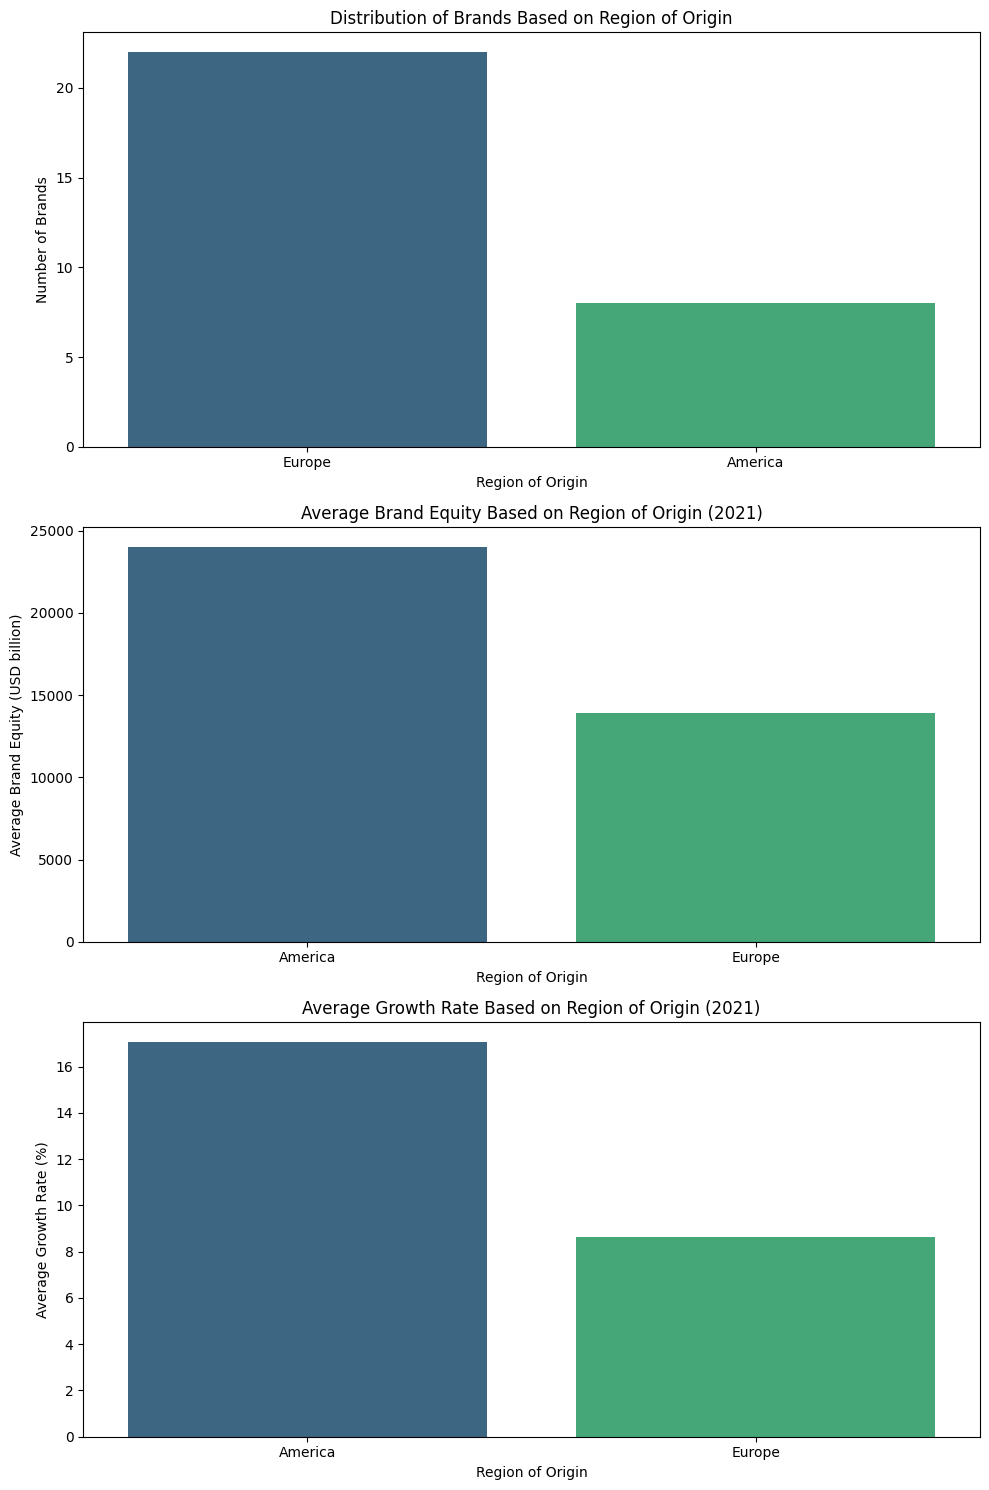

In [7]:
# Analyzing the distribution of brands based on region of origin
region_counts = df['BrandOriginRegion'].value_counts()

# Calculating average brand equity and growth rate based on region of origin for 2021
avg_equity_region = df.groupby('BrandOriginRegion')['Equity2021'].mean()
avg_growth_region = df.groupby('BrandOriginRegion')['GrowthRate2021'].mean()

# Plotting the distribution, average brand equity, and growth rate based on region of origin
fig, axes = plt.subplots(3, 1, figsize=(10, 15))

# Distribution of brands based on region of origin
sns.barplot(x=region_counts.index, y=region_counts.values, ax=axes[0], palette='viridis')
axes[0].set_title('Distribution of Brands Based on Region of Origin')
axes[0].set_xlabel('Region of Origin')
axes[0].set_ylabel('Number of Brands')

# Average brand equity based on region of origin for 2021
sns.barplot(x=avg_equity_region.index, y=avg_equity_region.values, ax=axes[1], palette='viridis')
axes[1].set_title('Average Brand Equity Based on Region of Origin (2021)')
axes[1].set_xlabel('Region of Origin')
axes[1].set_ylabel('Average Brand Equity (USD billion)')

# Average growth rate based on region of origin for 2021
sns.barplot(x=avg_growth_region.index, y=avg_growth_region.values, ax=axes[2], palette='viridis')
axes[2].set_title('Average Growth Rate Based on Region of Origin (2021)')
axes[2].set_xlabel('Region of Origin')
axes[2].set_ylabel('Average Growth Rate (%)')

plt.tight_layout()
plt.show()


**The visualizations provide insights into the distribution and performance of brands based on their region of origin:**

* Distribution of Brands Based on Region of Origin:
* The majority of brands in the dataset originate from Europe, with fewer brands coming from America.
* Average Brand Equity Based on Region of Origin (2021):
* European brands, on average, have a higher brand equity compared to American brands. This might be due to the prevalence of luxury brands from Europe, which typically have higher equity.
* Average Growth Rate Based on Region of Origin (2021):
* Brands from America experienced a slightly higher average growth rate in 2021 compared to European brands.

> In summary, while European brands dominate in terms of number and average brand equity, American brands have seen a slightly higher growth rate in the recent year.

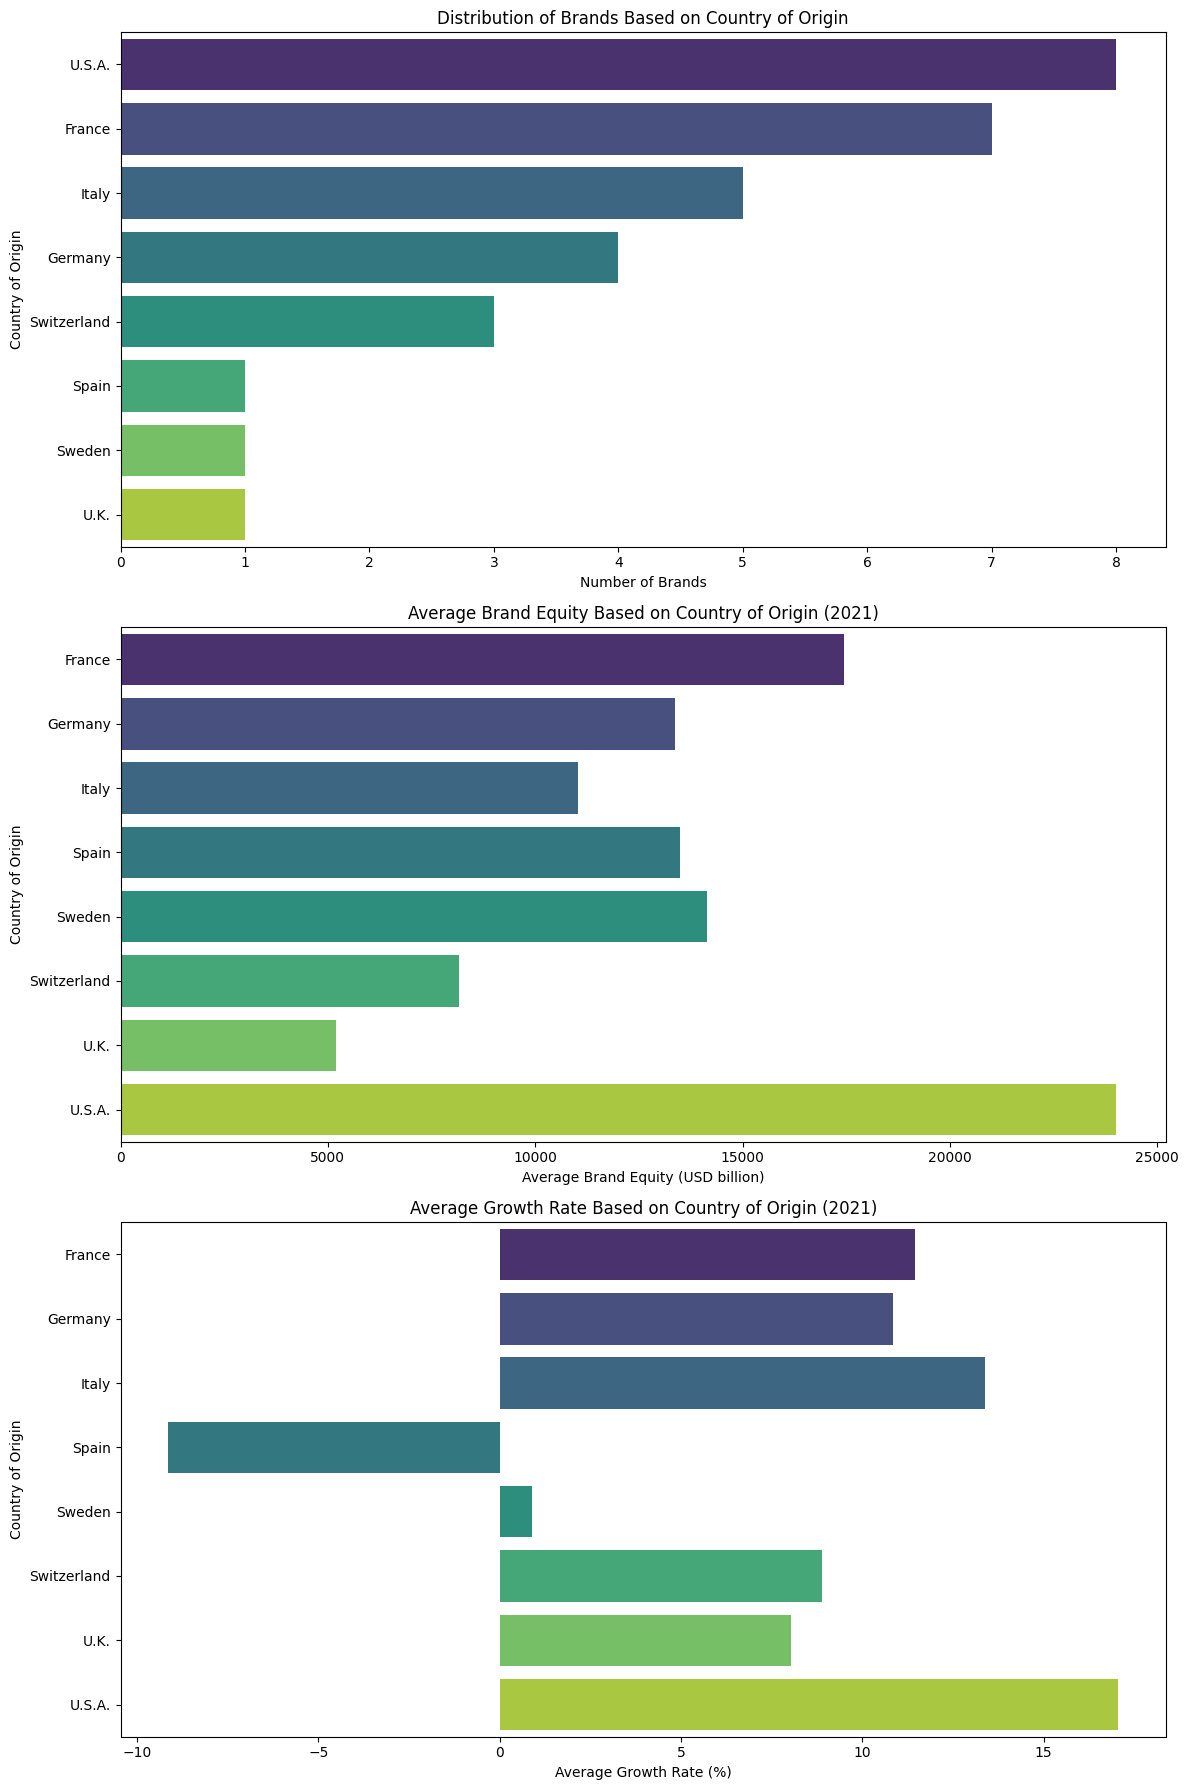

In [8]:
# Analyzing the distribution of brands based on country of origin
country_counts = df['BrandOriginCountry'].value_counts()

# Calculating average brand equity and growth rate based on country of origin for 2021
avg_equity_country = df.groupby('BrandOriginCountry')['Equity2021'].mean()
avg_growth_country = df.groupby('BrandOriginCountry')['GrowthRate2021'].mean()

# Plotting the distribution, average brand equity, and growth rate based on country of origin
fig, axes = plt.subplots(3, 1, figsize=(12, 18))

# Distribution of brands based on country of origin
sns.barplot(y=country_counts.index, x=country_counts.values, ax=axes[0], palette='viridis')
axes[0].set_title('Distribution of Brands Based on Country of Origin')
axes[0].set_xlabel('Number of Brands')
axes[0].set_ylabel('Country of Origin')

# Average brand equity based on country of origin for 2021
sns.barplot(y=avg_equity_country.index, x=avg_equity_country.values, ax=axes[1], palette='viridis')
axes[1].set_title('Average Brand Equity Based on Country of Origin (2021)')
axes[1].set_xlabel('Average Brand Equity (USD billion)')
axes[1].set_ylabel('Country of Origin')

# Average growth rate based on country of origin for 2021
sns.barplot(y=avg_growth_country.index, x=avg_growth_country.values, ax=axes[2], palette='viridis')
axes[2].set_title('Average Growth Rate Based on Country of Origin (2021)')
axes[2].set_xlabel('Average Growth Rate (%)')
axes[2].set_ylabel('Country of Origin')

plt.tight_layout()
plt.show()


**The visualizations provide insights based on the country of origin for the brands:**

**Distribution of Brands Based on Country of Origin:**
* The majority of brands in the dataset originate from the USA and France. Countries like Italy, Spain, and Sweden also have notable contributions.

**Average Brand Equity Based on Country of Origin (2021):**
* Brands from France, on average, have the highest brand equity, which is expected given the prevalence of luxury brands like Louis Vuitton, Chanel, and Hermès that are based in France.
* Brands from the USA and Italy also have significant average brand equities.

**Average Growth Rate Based on Country of Origin (2021):**
* Brands from the UK have seen the highest average growth rate in 2021, followed by brands from Italy and Spain.
* Brands from the USA and France have seen moderate growth in comparison.

In [9]:
# Extracting rank columns for years 2001-2021
rank_columns = [f'Rank{year}' for year in range(2001, 2022)]

# Calculating the difference in rank between 2001 and 2021
df['RankDifference'] = df['Rank2001'] - df['Rank2021']

# Filtering brands that have a positive rank difference and have data for both 2001 and 2021
improved_brands = df[df['RankDifference'] > 0][['BrandName', 'Rank2001', 'Rank2021', 'RankDifference']]

# Sorting the brands by the highest rank improvement
improved_brands = improved_brands.sort_values(by='RankDifference', ascending=False)

improved_brands


,BrandName,Rank2001,Rank2021,RankDifference
1,Chanel,61.0,22.0,39.0
0,Louis Vuitton,38.0,13.0,25.0
22,Nike,34.0,11.0,23.0
7,Adidas,70.0,49.0,21.0
11,Gucci,50.0,33.0,17.0


**The table above lists the brands that have shown the most significant improvement in their rankings from 2001 to 2021:**

* Chanel: Improved by 39 positions, moving from rank 61 in 2001 to rank 22 in 2021.
* Louis Vuitton: Climbed 25 positions, advancing from rank 38 in 2001 to rank 13 in 2021.
* Nike: Improved by 23 positions, rising from rank 34 in 2001 to rank 11 in 2021.
* Adidas: Ascended by 21 positions, from rank 70 in 2001 to rank 49 in 2021.
* Gucci: Advanced by 17 positions, from rank 50 in 2001 to rank 33 in 2021.

> These brands have demonstrated a consistent upward trajectory in their global rankings over the two decades.

In [10]:
# Extracting growth rate columns for years 2001-2021
growth_rate_columns = [f'GrowthRate{year}' for year in range(2001, 2022)]

# Calculating the standard deviation of growth rates for each brand to assess volatility
df['GrowthRateVolatility'] = df[growth_rate_columns].std(axis=1)

# Sorting brands by their growth rate volatility
most_volatile_brands = df[['BrandName', 'GrowthRateVolatility']].sort_values(by='GrowthRateVolatility', ascending=False).head(10)

most_volatile_brands


,BrandName,GrowthRateVolatility
8,Boss,72.878251
26,Ralph & Lauren,46.311287
0,Louis Vuitton,32.165388
11,Gucci,12.447094
12,Prada,11.161884
4,Dior,10.870522
16,Zara,10.606940
25,Gap,10.221973
21,Burberry,10.019938
17,H&M,9.819627


**The table above lists the brands that have shown the most volatility in their brand equity growth rates from 2001 to 2021:**

* Boss: Exhibits the highest volatility in growth rates, with a standard deviation of approximately 72.88.
* Ralph & Lauren: Also shows significant volatility with a standard deviation of 46.31.
* Louis Vuitton: Despite its strong brand equity, it has seen fluctuations in growth rates, with a standard deviation of 32.17.
* Gucci and Prada: Both have standard deviations around 12, indicating variability in their growth rates over the years.

> High volatility can be indicative of a brand's responsiveness to market dynamics, economic factors, and competition. While it can mean higher potential returns during good times, it can also suggest higher risks during downturns.